## Calculation of UTR-2 fluctuation sensitivity (!!! check carefully, not finished!!!)

Importing Python libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Setting constants and variables

In [9]:
freq = np.linspace(8, 33, 25)    # Frequency, MHz
c = 299792458                    # Speed of light, m/s
kB = 1.38064852 * pow(10,-23)    # Boltzmann constant, W * m-2 * Hz-1 * sr-1

Setting characteristics of radio telescope and observation mode

In [14]:
dt = 0.1                         # Temporal resolution, seconds
df = 3051                        # Spectral resolution, Hz
Aeff0 = 140000                    # Average effective area, m2
Efficiency = 1

### Sky background noise temperature by Cane
Tbg_Cane - (H.V. Cane, Non-thermal galactic background radiation, Ph.D. Thesis, University of Tasmania, 1977)

In [15]:
Igal = 2.48*pow(10,-20)*pow(freq,-0.52)*(1-np.exp(-5*pow(freq,-2.1)))/(5*pow(freq,-2.1))
Iexgal = 1.06*pow(10,-20)*pow(freq,-0.8)*np.exp(-5*pow(freq,-2.1))
Tbg_Cane = (Iexgal + Igal) * pow(c, 2) / (2 * pow(freq*1000000, 2) * kB)

## Fluctuation sensitivity

$$
\Delta S = \frac{T_A + T_N}{T_A} \cdot \frac{2 k_B T_{\text{sys}}}{A_{\text{eff}} \sqrt{\Delta t \cdot \Delta f}}
$$

In [16]:
NoiseFigure = 1
dS = NoiseFigure * Tbg_Cane * 2 * kB / (Aeff0 * Efficiency * pow(dt, 0.5) * pow (df, 0.5)) 

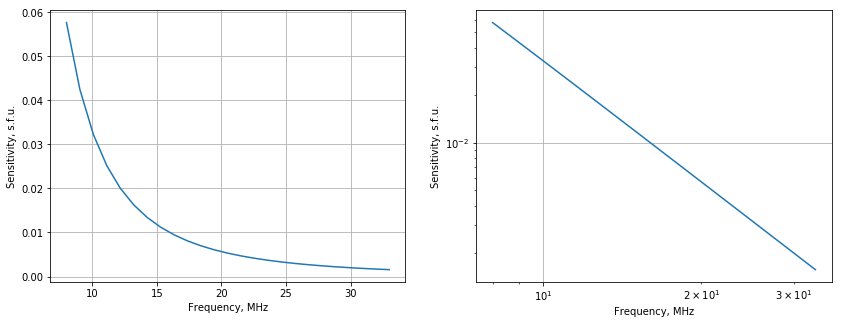

In [17]:
fig, ax = plt.subplots(1,2, facecolor = 'white', figsize = (14,5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.08)
    

ax[0].plot(freq, dS * pow(10,22))
ax[0].grid(True)
ax[0].set_xlabel('Frequency, MHz')
ax[0].set_ylabel('Sensitivity, s.f.u.')

ax[1].loglog(freq, dS * pow(10,22))
ax[1].grid(True)
ax[1].set_xlabel('Frequency, MHz')
ax[1].set_ylabel('Sensitivity, s.f.u.')

plt.show()

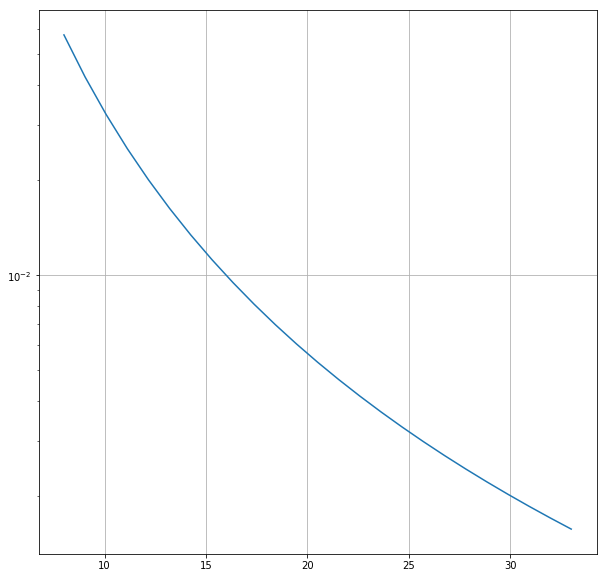

In [18]:
plt.figure(facecolor = 'white', figsize = (10,10))
plt.semilogy(freq, dS * pow(10,22))
#fig.set_xlabel('Frequency, MHz')
#fig.set_ylabel('Sensitivity, s.f.u.')
plt.grid(True)